# Blog 2: Logistic Regression

## Approach to Implementation and Experimentation

Implementing the logistic regression algorithm hinged on the correct deduction of partial derivatives from the logistic loss function. My source code, 


## Placement of Line in Data


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


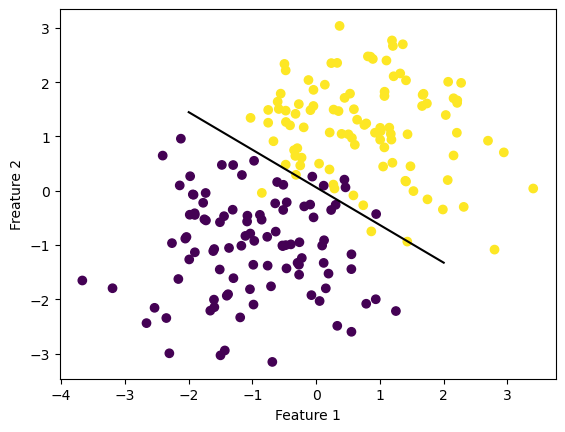

In [72]:
%load_ext autoreload
%autoreload 2
from logistic_regression import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
np.seterr(all='ignore')

p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Freature 2")

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

LR = LogisticRegression()
LR.fit(X, y, alpha = 0.3, max_epochs = 1000)

LR.w

fig = draw_line(LR.w, -2, 2)


## Stochastic Gradient vs. Gradient Loss (and Convergence)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


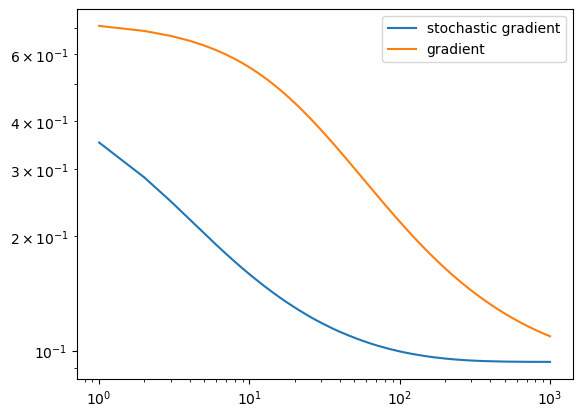

In [74]:
%load_ext autoreload
%autoreload 2
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 1000, 
                  alpha = .05)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 1000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend() 

# Experiments

## Experiment 1: Learning Rate is Too Large

When the learning rate is too large, there is no convergence on a minimizer (as demonstrated below). 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


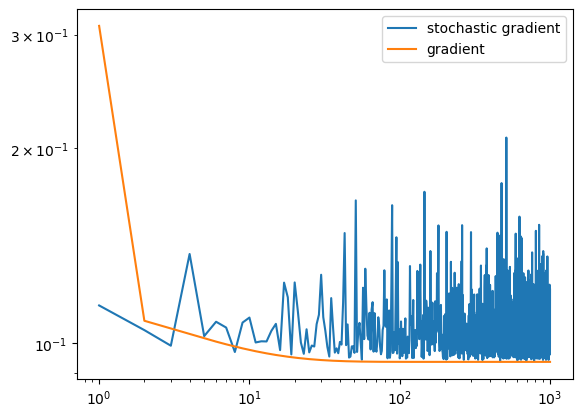

In [73]:
%load_ext autoreload
%autoreload 2

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 1000, 
                  alpha = 10)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = 10, max_epochs = 1000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend() 


## Experiment 2: Batch Size Changes

Example 1: Batch size of 100

A higher batch size leads to much quicker convergence As seen below. It takes far less than the 1000 designated maximum epochs to converge. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


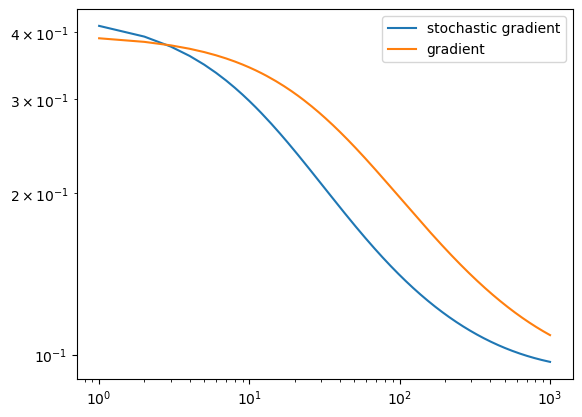

In [83]:
%load_ext autoreload
%autoreload 2

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 1000, 
                  alpha = .05,
                  batch_size = 100)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 1000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend() 

Example 2: Batch size of 10

Takes much longer to converge -- in fact, takes longer than the 1000 maximum epochs granted to the model. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


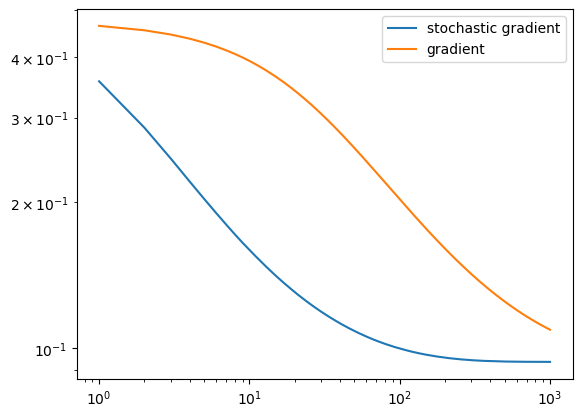

In [84]:
%load_ext autoreload
%autoreload 2
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 1000, 
                  alpha = .05)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 1000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend() 

## Experimentation Findings

